In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import seaborn as sns

# Member data

Gender column in membership data has a couple of NA's, in fact 65%, so not so much to use for this particular column. The data is distributed over 21 cities.

Total count: 6.8 M members (6769473, and all indeed unique, no duplicate msno's)
- Age [bd]: wildely distributed including negative values (plenty of them), thus have to find out later how useful it would be.
- Gender: as already listed before 65 % unkown, most probably not useful.
- City: distributed among 21 cities, most of the users live in city "1", over 5 M (most probably Taipeh)
- 18 different methods to register, out of those 4 are more wildly used (methods 3,4,7,9), the others are rather negligible.
- users registered starting from March 26, 2004 to April 29, 2017.

In [2]:
df_mem=pd.read_csv("data/members_v3.csv")
df_mem

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [3]:
df_mem["registration_init_time_as_dt"]=pd.to_datetime(df_mem["registration_init_time"], format='%Y%m%d', errors='ignore')

Monthly registration numbers show in general an increase up to begin of 2016, then we do observe quite a drop in registration numbers in the dat file but still higher numbers than in 2015

<AxesSubplot:xlabel='registration_init_time_as_dt'>

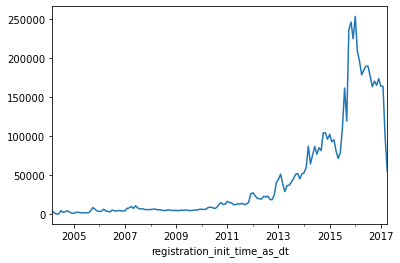

In [4]:
df_mem.groupby(pd.Grouper(key="registration_init_time_as_dt", freq="m")).count()["registration_init_time"].plot()

In [5]:
df_mem

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15
...,...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020,2015-10-20


In [6]:
print(df_mem["registration_init_time"].min(),df_mem["registration_init_time"].max())

20040326 20170429


In [7]:
df_mem.nunique()

msno                            6769473
city                                 21
bd                                  386
gender                                2
registered_via                       18
registration_init_time             4782
registration_init_time_as_dt       4782
dtype: int64

In [8]:
df_mem.isna().sum()/df_mem.isna().count()

msno                            0.000000
city                            0.000000
bd                              0.000000
gender                          0.654335
registered_via                  0.000000
registration_init_time          0.000000
registration_init_time_as_dt    0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

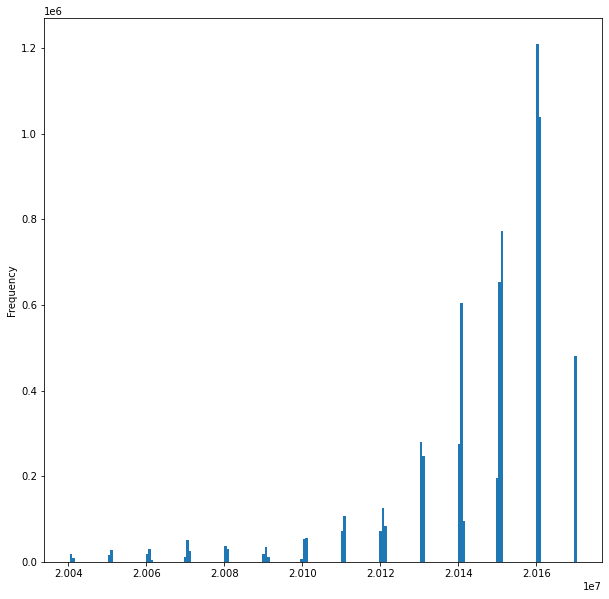

In [9]:
fig, ax = plt.subplots()
df_mem["registration_init_time"].plot(kind="hist",ax=ax,figsize=(10,10),bins=200)

<AxesSubplot:>

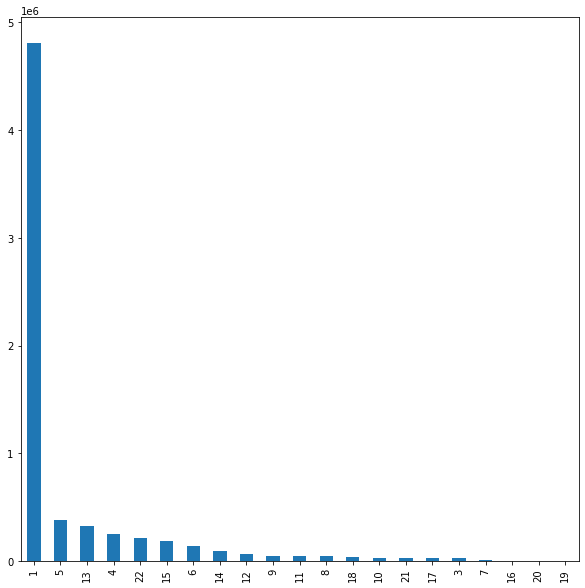

In [10]:
fig, ax = plt.subplots()
df_mem["city"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

<AxesSubplot:>

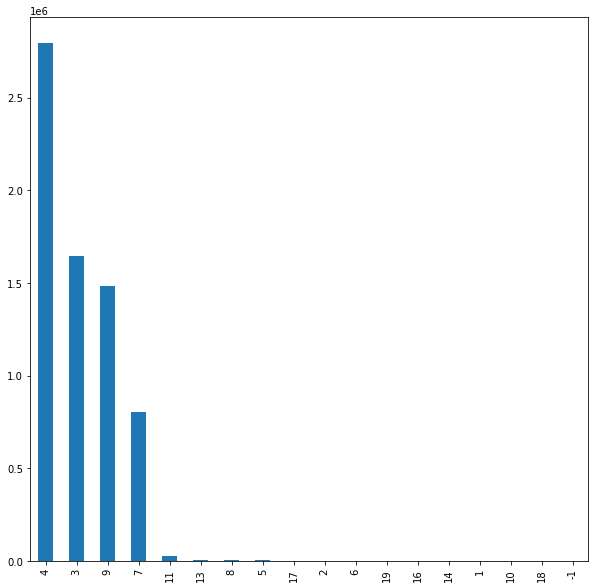

In [11]:
fig, ax = plt.subplots()
df_mem["registered_via"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

In [12]:
df_ul=pd.read_csv("data/user_logs_v2.csv")
df_ul.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [13]:
df_train=pd.read_csv("data/train.csv")
df_train.sort_values(by=["msno"])

,msno,is_churn
321092,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
663804,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0
107459,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0
396726,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0
426433,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0
...,...,...
320038,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0
480976,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0
888205,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0
19995,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,1


In [14]:
df_train.nunique()

msno        992931
is_churn         2
dtype: int64

In [15]:
df_train_v2=pd.read_csv("data/train_v2.csv")
df_train_v2.sort_values(by=["msno"])

,msno,is_churn
760876,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
798970,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0
827003,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0
656165,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0
193862,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0
...,...,...
759905,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0
930350,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,0
10783,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1
336622,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0


In [16]:
df_train_v2.nunique()

msno        970960
is_churn         2
dtype: int64

It is obvious that ID's from the first dataframe are also included in the second dataframe, which contains updated values, it is also checked that indeed all ID"s are unique(). Not all ID's of the first train data are included in the V2 train date, will in the following concentrate on the V2 data.

In [17]:
df_train[df_train["msno"].duplicated()]

,msno,is_churn


## Transaction Data

In the transaction data there are a couple of duplicates, but not too drastic, 3339 out of 21547746 entries. For the extension none out of 1431009 entries are duplicated. After merging both datasets, the number of duplicates remains at 3339, thus both original transaction datasets don't overlap. In total transactions for 2426143 users are listed.

Issue in membership_expire_date: at times this value is the start of unixtime, thus this part is imputed with the 

In [129]:
df_tra=pd.read_csv("data/transactions.csv")

df_tra_V2=pd.read_csv("data/transactions_v2.csv")

df_tra=df_tra.append(df_tra_V2)

df_tra=df_tra.drop_duplicates(ignore_index=True)
df_tra["transaction_date_dt"]=pd.to_datetime(df_tra["transaction_date"], format='%Y%m%d', errors='ignore')
df_tra["membership_expire_date_dt"]=pd.to_datetime(df_tra["membership_expire_date"], format='%Y%m%d', errors='ignore')
df_tra

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,2015-09-30,2015-11-01
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0,2015-09-30,2016-04-27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0,2015-09-30,2015-11-28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21
...,...,...,...,...,...,...,...,...,...,...,...
22975411,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,20170215,20170817,0,2017-02-15,2017-08-17
22975412,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,20170306,20170406,0,2017-03-06,2017-04-06
22975413,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,20170308,20170408,0,2017-03-08,2017-04-08
22975414,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,20170318,20170417,0,2017-03-18,2017-04-17


In [130]:
df_tra[df_tra.duplicated()]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt


In [131]:
#df_tra[df_tra['is_auto_renew']==0].sort_values(by=["msno","transaction_date"]).head(50)

In [132]:
#df_tra.sort_values(by=["transaction_date","msno"]).tail(50)

In [133]:
df_delta_tra=df_tra.sort_values(by=["transaction_date_dt"]).groupby(["msno"])[["actual_amount_paid","transaction_date_dt","membership_expire_date_dt"]].shift()

df_delta_tra=df_delta_tra.rename(columns={"actual_amount_paid": "actual_amount_paid_prev", "transaction_date_dt": "transaction_date_dt_prev", "membership_expire_date_dt": "membership_expire_date_dt_prev"})

df_delta_tra=pd.concat([df_tra, df_delta_tra], axis=1, sort=False)
df_delta_tra['delta_transaction_date']=df_delta_tra['transaction_date_dt']-df_delta_tra['transaction_date_dt_prev']
df_delta_tra['delta_amount_paid']=df_delta_tra['actual_amount_paid']-df_delta_tra['actual_amount_paid_prev']

df_delta_tra['delta_transact_date_members_exp_prev']=df_delta_tra['transaction_date_dt_prev']-df_delta_tra['membership_expire_date_dt_prev']



#df_tra=df_tra.drop_duplicates()
"""
df_ord_deltas_V1=df_ord[["user_id","paid_date","order_total"]]

df_ord_deltas=df_ord.sort_values(by=["paid_date"]).groupby(["user_id"])[["paid_date","order_total"]].shift()

df_ord_deltas=df_ord_deltas.rename(columns={"paid_date": "paid_date_prev", "order_total": "order_total_prev"})

deltas_merge=pd.concat([df_ord_deltas_V1, df_ord_deltas], axis=1, sort=False)
#deltas_merge[deltas_merge["user_id"].count()>1].sort_values(by="user_id")
deltas_merge[deltas_merge["user_id"].duplicated(keep=False)].sort_values(by=["user_id","paid_date"]).tail(20)

deltas_merge["paid_date_break"]=deltas_merge["paid_date"]-deltas_merge["paid_date_prev"]
deltas_merge["order_total_diff"]=deltas_merge["order_total"]-deltas_merge["order_total_prev"]
"""
df_delta_tra

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,membership_expire_date_dt_prev,delta_transaction_date,delta_amount_paid,delta_transact_date_members_exp_prev
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,2015-09-30,2015-11-01,129.0,2015-08-31,2015-10-01,30 days,0.0,-31 days
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31,149.0,2015-08-31,2015-09-30,30 days,0.0,-30 days
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0,2015-09-30,2016-04-27,149.0,2015-09-26,2016-03-27,4 days,-20.0,-183 days
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0,2015-09-30,2015-11-28,149.0,2015-08-31,2015-10-28,30 days,0.0,-58 days
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21,149.0,2015-08-31,2015-10-21,30 days,0.0,-51 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22975411,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,20170215,20170817,0,2017-02-15,2017-08-17,536.0,2016-08-15,2017-02-14,184 days,0.0,-183 days
22975412,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,20170306,20170406,0,2017-03-06,2017-04-06,149.0,2017-02-06,2017-03-06,28 days,0.0,-28 days
22975413,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,20170308,20170408,0,2017-03-08,2017-04-08,99.0,2017-02-08,2017-03-08,28 days,0.0,-28 days
22975414,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,20170318,20170417,0,2017-03-18,2017-04-17,149.0,2017-02-16,2017-03-18,30 days,0.0,-30 days


In [140]:
df_delta_tra[(df_delta_tra['membership_expire_date_dt_prev']=='1970-01-01') & (df_delta_tra['is_auto_renew']==0)]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,membership_expire_date_dt_prev,delta_transaction_date,delta_amount_paid,delta_transact_date_members_exp_prev,payment_plan_days_dt
63092,bngPj/GZ1XAbNl550kGEUTiOuX3PHhSBnRqz11Ps4M8=,36,30,180,180,0,20160714,20160813,0,2016-07-14,2016-08-13,149.0,2015-06-05,1970-01-01,405 days,31.0,16591 days,30 days
65103,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20170218,20170320,0,2017-02-18,2017-03-20,0.0,2017-02-06,1970-01-01,12 days,149.0,17203 days,30 days
208167,7jopNJQ/Njd2lLpdfiKmXC3Yp1SrorbF09bV/G89dnM=,28,30,150,150,0,20170112,20170214,0,2017-01-12,2017-02-14,0.0,2017-01-12,1970-01-01,0 days,150.0,17178 days,30 days
261848,OdhdojymCideZ1eH5RUlm5MZathNk23T01i7Z7qchOY=,15,60,300,300,0,20170113,20170317,0,2017-01-13,2017-03-17,0.0,2017-01-10,1970-01-01,3 days,300.0,17176 days,60 days
264515,HO5NU9M8mKuDakbWBnSbiLx68RcMVjG6bO85N2R4yWQ=,15,60,300,300,0,20170119,20170323,0,2017-01-19,2017-03-23,0.0,2017-01-16,1970-01-01,3 days,300.0,17182 days,60 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22963834,MXay3oKhbyYXRlHezljHfHcJYwQJ8wbw9QO4AAKRkYM=,15,90,300,300,0,20170210,20170514,0,2017-02-10,2017-05-14,0.0,2017-02-03,1970-01-01,7 days,300.0,17200 days,90 days
22964534,T/ujvwTufhIZhfu34ibxGOEnLXD4pwfWsiTqV4cS5ug=,15,120,600,600,0,20170125,20170530,0,2017-01-25,2017-05-30,0.0,2017-01-24,1970-01-01,1 days,600.0,17190 days,120 days
22971050,MrwwN14pds5gFJZ+vBv8/mGJKSQifCRlQp//lvbBkxg=,15,180,600,600,0,20170206,20170808,0,2017-02-06,2017-08-08,0.0,2017-02-03,1970-01-01,3 days,600.0,17200 days,180 days
22971104,NLxSVGoOiL5lzMBcUvHAmOSSM5kb+imBHHsNSXvleHw=,15,90,300,300,0,20170117,20170509,0,2017-01-17,2017-05-09,0.0,2017-01-15,1970-01-01,2 days,300.0,17181 days,90 days


In [138]:
df_delta_tra['payment_plan_days_dt']=pd.to_timedelta(df_delta_tra['payment_plan_days'],unit='days')
df_delta_tra['membership_expire_date_dt']=np.where(df_delta_tra['membership_expire_date_dt']=='1970-01-01',
                                                  np.where(df_delta_tra['is_auto_renew']==1,
                                                           df_delta_tra['membership_expire_date_dt_prev']+pd.to_timedelta(df_delta_tra['payment_plan_days_dt']),
                                                           df_delta_tra['transaction_date_dt']+pd.to_timedelta(df_delta_tra['payment_plan_days_dt'],unit='days')
                                                          ),
                                                  df_delta_tra['membership_expire_date_dt'])

In [141]:
df_delta_tra[df_delta_tra['msno']=='j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,membership_expire_date_dt_prev,delta_transaction_date,delta_amount_paid,delta_transact_date_members_exp_prev,payment_plan_days_dt
65103,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20170218,20170320,0,2017-02-18,2017-03-20,0.0,2017-02-06,1970-01-01,12 days,149.0,17203 days,30 days
2433499,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20161202,20170101,0,2016-12-02,2017-01-01,149.0,2016-10-27,2016-11-26,36 days,0.0,-30 days,30 days
3530413,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20170106,20170205,0,2017-01-06,2017-02-05,149.0,2016-12-02,2017-01-01,35 days,0.0,-30 days,30 days
5046758,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,17,60,0,0,0,20170206,19700101,0,2017-02-06,2017-04-07,149.0,2017-01-06,2017-02-05,31 days,-149.0,-30 days,60 days
9784647,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20161027,20161126,0,2016-10-27,2016-11-26,149.0,2016-09-26,2016-10-26,31 days,0.0,-30 days,30 days
11437054,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20160827,20160926,0,2016-08-27,2016-09-26,149.0,2016-07-27,2016-08-26,31 days,0.0,-30 days,30 days
18847314,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20160926,20161026,0,2016-09-26,2016-10-26,149.0,2016-08-27,2016-09-26,30 days,0.0,-30 days,30 days
20915502,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20160727,20160826,0,2016-07-27,2016-08-26,NaN,NaT,NaT,NaT,NaN,NaT,30 days
22966351,j+GA9oK4SIPX70aon8WqrbtnZ8REZrGZfG7TSDSRetY=,38,30,149,149,0,20170321,20170420,0,2017-03-21,2017-04-20,149.0,2017-02-18,2017-03-20,31 days,0.0,-30 days,30 days


In [119]:
df_sort_temp=df_delta_tra.sort_values(by=["delta_transact_date_members_exp_prev"],ascending=False)

In [121]:
df_sort_temp.head(50)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,membership_expire_date_dt_prev,delta_transaction_date,delta_amount_paid,delta_transact_date_members_exp_prev
17472351,aREgLyas86/Am64GlZN6mFPCVNIVjkukvbbrlnInamM=,29,30,180,180,1,20170221,20170321,0,2017-02-21,2017-03-21,180.0,2017-02-20,1970-01-01,1 days,0.0,17217 days
11641851,ODu2d8mx3G95F2b651/rh/aczCTCdn4Ks7a96yxcSIE=,39,30,149,149,1,20170214,20170313,0,2017-02-14,2017-03-13,180.0,2017-02-13,1970-01-01,1 days,-31.0,17210 days
22784482,IBl1JKt7o+YLS6efC6RtqczYtqjF6v2zJu3OAys6IEQ=,15,240,1200,1200,0,20170207,20171010,0,2017-02-07,2017-10-10,0.0,2017-02-06,1970-01-01,1 days,1200.0,17203 days
21969794,UuHwsdQUjGmmD0nfo00wh5yRLBY2VpzbN1zmnwXscQk=,15,360,1200,1200,0,20170208,20180207,0,2017-02-08,2018-02-07,0.0,2017-02-06,1970-01-01,2 days,1200.0,17203 days
4483319,Z2Wct5KYbgD8SOeiR+HE8GOkC+CtC8P0W1L6/aIIItY=,38,30,149,149,0,20170206,20170311,0,2017-02-06,2017-03-11,0.0,2017-02-06,1970-01-01,0 days,149.0,17203 days
22933193,4ONsOjyKpC0kv5bF7B9hl+4pBU5F4zSJ+cVltH3Wwac=,15,240,1200,1200,0,20170207,20171010,0,2017-02-07,2017-10-10,0.0,2017-02-06,1970-01-01,1 days,1200.0,17203 days
22458381,gxrJa0xBxt5D1KuDUS1xy/q8jrAep16MrLMNLYi/sy0=,15,360,1200,1200,0,20170222,20180220,0,2017-02-22,2018-02-20,0.0,2017-02-06,1970-01-01,16 days,1200.0,17203 days
21925504,J3Wl5Tdtd1rUCR8BNcdC4R1PgHBGL4LlotyVW1RnrjE=,12,60,300,300,0,20170212,20170416,0,2017-02-12,2017-04-16,0.0,2017-02-06,1970-01-01,6 days,300.0,17203 days
21555804,aIfHsXQHmSfdWL+26Rwja7TKZGatm97iyJiZYkUVmDM=,15,360,1200,1200,0,20170207,20180207,0,2017-02-07,2018-02-07,0.0,2017-02-06,1970-01-01,1 days,1200.0,17203 days
22961488,1lJoV5yMKTaaKsxx/iSfiRT5w+yFM5UzfSFEoV0YU2s=,15,90,300,300,0,20170208,20170513,0,2017-02-08,2017-05-13,0.0,2017-02-06,1970-01-01,2 days,300.0,17203 days


In [110]:
df_sort_temp.tail(50)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,membership_expire_date_dt_prev,delta_transaction_date,delta_amount_paid,delta_transact_date_members_exp_prev
22974338,psFaELa2IjGHYKRMw1zbOokeGHD9iySBajHNQUwOlLU=,12,410,1788,1788,0,20160829,20171016,0,2016-08-29,2017-10-16,NaN,NaT,NaT,NaT,NaN,NaT
22974369,q5V98oTlAvni7UF7W+rlu0iKc31wyhH5loMsMP6bqeE=,32,90,298,298,0,20170201,20170502,0,2017-02-01,2017-05-02,NaN,NaT,NaT,NaT,NaN,NaT
22974377,qBnPSUyXqWgrRPt9zZo0B5w3Wc0MLNJ+lyqpROlZPT8=,32,180,536,536,0,20170309,20170908,0,2017-03-09,2017-09-08,NaN,NaT,NaT,NaT,NaN,NaT
22974390,qIr5Mj3f2OUEkiVjrrEZziVEH/WZU4yGUCQE3fV18h8=,35,7,0,0,0,20170316,20170717,0,2017-03-16,2017-07-17,NaN,NaT,NaT,NaT,NaN,NaT
22974396,qLvJLMESJEByC4DbMmfBVJIcHo5RXJN2RunikU2p+l0=,41,30,100,100,1,20170328,20170430,0,2017-03-28,2017-04-30,NaN,NaT,NaT,NaT,NaN,NaT
22974415,qYxqgSiIz74RjLepqjiFM59o58rmQPBCsNW8AxjrhFk=,32,410,1788,1788,0,20160321,20170508,0,2016-03-21,2017-05-08,NaN,NaT,NaT,NaT,NaN,NaT
22974456,qvLeMx+zdS7VlRNyhNduuHE/awoxlEwgi9oc62VJbaA=,32,410,1788,1788,0,20160807,20170927,0,2016-08-07,2017-09-27,NaN,NaT,NaT,NaT,NaN,NaT
22974492,rELMDqzznc6L6o6GMT8dXy92kT7zVUBF9JKjFWnHy60=,32,180,699,699,0,20161101,20170430,0,2016-11-01,2017-04-30,NaN,NaT,NaT,NaT,NaN,NaT
22974502,rKpzXUKTGh5u0+b9KLq6y7EUNweTGG8qbVcRHoQbeZw=,32,195,894,894,0,20161230,20170713,0,2016-12-30,2017-07-13,NaN,NaT,NaT,NaT,NaN,NaT
22974511,rQieGHbaP+gbxxi4qTW7Vha97r8xr7XGmQWXOQGk6Ug=,32,90,298,298,0,20170314,20170612,0,2017-03-14,2017-06-12,NaN,NaT,NaT,NaT,NaN,NaT


In [ ]:
#now check delta max/min between transaction dates
#delta max/min between membership expire and transaction
#check sum membership expire/transaction
#check membership duration
#check positive value difference transaction-membership expire
#check membership
#sum of how many is_cancel, how many auto_renew, also check how many nunique per msno
#sum of actual_amount
#delta amount with prev
#sum plan_list_price/sum actual_amount_paid
#check how many different payment_method_ids/largst mode payment_method_id
#check min/max/avg payment price
#check sum payment_plan/largest mode payment_plan_days/avg payment_plan_days/median payment_plan_days

In [100]:
df_tra_agg_per_user=df_delta_tra.groupby(["msno"]).agg(
    total_num_subscription=('payment_plan_days','count'),
    min_mem_exp_prev_trans_date=(lambda x: min(x['transaction_date']-x['membership_expire_date_prev']))
    ).reset_index()
df_tra_agg_per_user

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [98]:
df_delta_tra.sort_values(by=["msno","transaction_date"]).head(50)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,actual_amount_paid_prev,transaction_date_prev,membership_expire_date_prev
6797500,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,20160909,20160914,0,NaN,NaN,NaN
1521462,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,20151121,20170104,0,NaN,NaN,NaN
21794121,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0,1788.0,20151121.0,20170104.0
1498575,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161116,20161215,0,NaN,NaN,NaN
17920919,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161215,20170115,0,99.0,20161116.0,20161215.0
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20170115,20170215,0,99.0,20161215.0,20170115.0
1914732,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20170215,20170315,0,99.0,20170115.0,20170215.0
22560193,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20170315,20170415,0,99.0,20170215.0,20170315.0
7797909,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,20150131,20150319,0,NaN,NaN,NaN
14493296,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,20150228,20150419,0,149.0,20150131.0,20150319.0


In [99]:
df_delta_tra.sort_values(by=["msno","transaction_date"]).tail(50)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,actual_amount_paid_prev,transaction_date_prev,membership_expire_date_prev
1969113,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,119,1,20150804,20150905,0,119.0,20150704.0,20150805.0
11151333,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,119,1,20150904,20151005,0,119.0,20150804.0,20150905.0
8289333,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,119,1,20151004,20151105,0,119.0,20150904.0,20151005.0
16546219,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,119,119,1,20151104,20151205,0,119.0,20151004.0,20151105.0
5606035,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20151204,20160105,0,119.0,20151104.0,20151205.0
14518277,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20160104,20160205,0,149.0,20151204.0,20160105.0
15882175,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20160204,20160305,0,149.0,20160104.0,20160205.0
19419131,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20160304,20160405,0,149.0,20160204.0,20160305.0
13903480,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20160404,20160505,0,149.0,20160304.0,20160405.0
21417052,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,20160504,20160605,0,149.0,20160404.0,20160505.0


In [78]:
df_tra.groupby(["msno"]).count().sort_values(by=["payment_method_id"],ascending=False)

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
msno,,,,,,,,
72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=,244,244,244,244,244,244,244,244
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=,220,220,220,220,220,220,220,220
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,187,187,187,187,187,187,187,187
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,173,173,173,173,173,173,173,173
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=,158,158,158,158,158,158,158,158
...,...,...,...,...,...,...,...,...
Wfslw2IPOqg5pZigYDE6M7q3q0c/GhC/aPdy7cvH87w=,1,1,1,1,1,1,1,1
Wft+QBktv1ht4viNq1qTYdn+TylEePcjQopCOhJ5Cxk=,1,1,1,1,1,1,1,1
Wftnj1/0UWNxBdlJA3/amO3dqn/oky8HuT8H5shKOoY=,1,1,1,1,1,1,1,1


In [69]:
df_tra.nunique()

msno                      2426143
payment_method_id              40
payment_plan_days              37
plan_list_price                55
actual_amount_paid             65
is_auto_renew                   2
transaction_date              821
membership_expire_date       3473
is_cancel                       2
dtype: int64

In [67]:
df_tra_V2[df_tra_V2.duplicated()].sort_values(by=["msno"])

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel


In [19]:
print(df_tra[df_tra.duplicated(subset=['msno'], keep=False)].shape[0]/df_tra.shape[0])
print(df_tra.shape[0],len(df_tra["msno"].unique()))
df_tra[df_tra.duplicated(subset=['msno'], keep=False)].sort_values(by=['msno']).head(50)

0.26289072954817194
1431009 1197050


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1030112,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,20170228,20170419,0
335565,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,20170331,20170519,0
593491,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,30,149,149,1,20170228,20170423,0
1144689,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,30,149,149,1,20170331,20170523,0
121150,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,30,149,149,1,20170331,20170504,0
657865,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,30,149,149,1,20170228,20170404,0
1402390,++5BmBHS2ebe4Whfg/7KhGkj/sQ6rtNHsktLxsI01KE=,39,30,149,149,1,20170228,20170401,0
529428,++5BmBHS2ebe4Whfg/7KhGkj/sQ6rtNHsktLxsI01KE=,39,30,149,149,1,20170331,20170501,0
543631,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,39,30,149,149,1,20170331,20170521,0
278318,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,39,30,149,149,1,20170228,20170421,0


In [20]:
print(df_ul.shape,df_mem.shape,df_train.shape,df_tra.shape)

(18396362, 9) (6769473, 7) (992931, 2) (1431009, 9)


In [21]:
print(len(df_ul["msno"].unique()),len(df_mem["msno"].unique()),len(df_train["msno"].unique()),len(df_tra["msno"].unique()))

1103894 6769473 992931 1197050


In [22]:
print("churn rage",len(df_train[df_train["is_churn"]==1]["is_churn"])/len(df_train["is_churn"]))

churn rage 0.06392287077349786


In [23]:
print(df_mem["city"].unique())
print(len(df_mem["city"].unique()))

[ 1  6  4  5 13 22 12 15 11  9 14  8 18 21  3  7 17 10 20 16 19]
21


In [24]:
df_mem.isna().sum()/df_mem.shape[0]

msno                            0.000000
city                            0.000000
bd                              0.000000
gender                          0.654335
registered_via                  0.000000
registration_init_time          0.000000
registration_init_time_as_dt    0.000000
dtype: float64

In [25]:
df_ul.isna().sum()/df_ul.shape[0]

msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64

In [26]:
df_train.isna().sum()/df_train.shape[0]

msno        0.0
is_churn    0.0
dtype: float64

In [27]:
df_tra.isna().sum()/df_tra.shape[0]

msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64

In [28]:
print(len(df_tra["payment_method_id"].unique()),df_tra["payment_plan_days"].unique(),len(df_tra["plan_list_price"].unique()))

37 [ 90  30 410 180 195 100 365 395 360 240   0 450   7 200  60 120 415 400
 270  31   1  14  10  80  70  45  35 230   3 110  21] 48


In [29]:
df_mem["registered_via"].unique()

array([11,  7,  9,  3, 16,  4, 13, 17,  5,  2, 19,  8,  6, 14,  1, 18, 10,
       -1])

In [30]:
df_merge=pd.merge(df_train, df_mem, how='left', on='msno')
print(df_merge.shape, df_mem.shape, df_train.shape)
df_merge.head(20)

(992931, 8) (6769473, 7) (992931, 2)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,2005-04-06
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,2005-04-07
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,2005-10-16
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,2005-11-02
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,2005-12-28
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,6.0,23.0,female,9.0,20060331.0,2006-03-31
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,13.0,29.0,female,9.0,20060406.0,2006-04-06
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,11.0,22.0,male,9.0,20060425.0,2006-04-25
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,18.0,22.0,female,9.0,20060826.0,2006-08-26
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,11.0,31.0,female,9.0,20061123.0,2006-11-23


In [31]:
df_tra[df_tra["msno"]=="8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ="].head(20)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
229350,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150908,20170608,0
394200,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150908,20170708,0
394201,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151208,20171208,0
408588,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151108,20171008,0
415886,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151008,20170908,0
473042,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151008,20170808,0
938486,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151108,20171107,0
1024150,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150808,20170509,0
1282069,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20151208,20180108,0
1389270,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,41,30,149,149,1,20150808,20170408,0


In [32]:
df_merge_tra=pd.merge(df_merge, df_tra, how='left', on='msno')
print(df_merge_tra.shape,df_merge.shape, df_tra.shape)
df_merge_tra.head(20)

(1190140, 16) (992931, 8) (1431009, 9)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,2005-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,2005-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,2005-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,2005-11-02,40.0,30.0,149.0,149.0,1.0,20170327.0,20170426.0,0.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,2005-12-28,38.0,90.0,477.0,477.0,0.0,20170225.0,20170528.0,0.0
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,6.0,23.0,female,9.0,20060331.0,2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,13.0,29.0,female,9.0,20060406.0,2006-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,11.0,22.0,male,9.0,20060425.0,2006-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,18.0,22.0,female,9.0,20060826.0,2006-08-26,38.0,30.0,149.0,149.0,0.0,20170307.0,20170406.0,0.0
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,11.0,31.0,female,9.0,20061123.0,2006-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We checked already previously, that for some ID's we have two entries in the transaction database. Some of those are present due to a change of plan, change of payments. Typically there are two entries per user, in total 26 % of all transaction data is coming from users wich two (or more ntries). Thus I would expect the after merging the transaction and the membership/churn dataframe, that the shape does increase. 

In [33]:
df_merge_tra.dtypes

msno                                    object
is_churn                                 int64
city                                   float64
bd                                     float64
gender                                  object
registered_via                         float64
registration_init_time                 float64
registration_init_time_as_dt    datetime64[ns]
payment_method_id                      float64
payment_plan_days                      float64
plan_list_price                        float64
actual_amount_paid                     float64
is_auto_renew                          float64
transaction_date                       float64
membership_expire_date                 float64
is_cancel                              float64
dtype: object

In [34]:
df_merge_tra["registration_init_time"]=pd.to_datetime(df_merge_tra["registration_init_time"],format="%Y%m%d")
df_merge_tra["transaction_date"]=pd.to_datetime(df_merge_tra["transaction_date"],format="%Y%m%d")
df_merge_tra["membership_expire_date"]=pd.to_datetime(df_merge_tra["membership_expire_date"],format="%Y%m%d")
df_merge_tra.head(10)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,2005-04-06,2005-04-06,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,2005-04-07,2005-04-07,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,2005-10-16,2005-10-16,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,2005-11-02,2005-11-02,40.0,30.0,149.0,149.0,1.0,2017-03-27,2017-04-26,0.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,2005-12-28,2005-12-28,38.0,90.0,477.0,477.0,0.0,2017-02-25,2017-05-28,0.0
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,6.0,23.0,female,9.0,2006-03-31,2006-03-31,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,13.0,29.0,female,9.0,2006-04-06,2006-04-06,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,11.0,22.0,male,9.0,2006-04-25,2006-04-25,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,18.0,22.0,female,9.0,2006-08-26,2006-08-26,38.0,30.0,149.0,149.0,0.0,2017-03-07,2017-04-06,0.0
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,11.0,31.0,female,9.0,2006-11-23,2006-11-23,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [35]:
df_ul["date"]=pd.to_datetime(df_ul["date"],format="%Y%m%d")
df_ul.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558
5,qR/ndQ5B+1cY+c9ihwLoiz+RFiqEnGyQKo32ZErEVKo=,2017-03-31,3,0,0,0,39,41,9786.842
6,N6ch5ArfJixq9mvARJv9ip1D11uvDVazz6Qup5mX7DI=,2017-03-30,9,1,0,0,18,26,4920.255
7,JEjl2W1ivEI6epeobW3n5rDg/r6PJm4OJhtmhwYaQIc=,2017-03-31,181,68,5,3,54,291,22433.105
8,lPK4IYIFdfTT6pq7x2dSV1Vy9j9hNMWzf7XfYBUBz5E=,2017-03-31,3,0,1,1,181,150,46240.281
9,cDgnvwQwCwru2m3zcSuK5oTr6pr1nMPQ/6RerOmxrs0=,2017-03-31,5,4,1,1,30,31,7881.618


Maybe make a second category for returning customers, else need to dense down the information per user for example from the logs, look at the distributions and have for example a look at the ratio of num_25/mum_50 etc songs, or look at the average number of seconds spend things like that.

In [36]:
df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].head(50)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
35,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,119.0,1.0,2015-07-14,2017-05-13,0.0
36,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,119.0,119.0,1.0,2015-10-14,2017-11-13,0.0
37,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-11-13,2017-12-13,0.0
38,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-09-13,2017-08-13,0.0
39,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-08-13,2017-06-13,0.0
40,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,119.0,1.0,2015-09-14,2017-09-12,0.0
41,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,119.0,1.0,2015-08-14,2017-07-14,0.0
42,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-11-16,2017-12-14,1.0
43,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-10-13,2017-10-13,0.0
44,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-12-13,2018-01-14,0.0


In [37]:
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].shape)
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1].shape)
print("count of churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique()))
print("count of no churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==0]["msno"].unique()))
print("churn rate in transaction duplicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]["msno"].unique()))
print("overall churn rate",len(df_merge[df_merge["is_churn"]==1]["msno"].unique())/len(df_merge["msno"].unique()))
print("no churn rate in no duplicates transaction data")
print(df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).count()/df_merge_tra.drop_duplicates(subset=['msno'],keep=False).count())
#print(len(df_merge_tra[not df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplica

(315629, 16)
(27085, 16)
count of churns in transaction dupolicates 4907
count of no churns in transaction dupolicates 988024
churn rate in transaction duplicates 0.04143725722006418
overall churn rate 0.06392287077349786
no churn rate in no duplicates transaction data
msno                            0.933032
is_churn                        0.933032
city                            0.930623
bd                              0.930623
gender                          0.898227
registered_via                  0.930623
registration_init_time          0.930623
registration_init_time_as_dt    0.930623
payment_method_id               0.983245
payment_plan_days               0.983245
plan_list_price                 0.983245
actual_amount_paid              0.983245
is_auto_renew                   0.983245
transaction_date                0.983245
membership_expire_date          0.983245
is_cancel                       0.983245
dtype: float64


We wondered how we should deal with the duplicate entries (with respect to userID) in the transaction data. If we check the amount of churns in terms of total members, the rate is about 8.9%. If we consider now duplicate appearance in the transaction, the people who churned appear there with about 19.8 %, so more as double the rate. Thus it is something which we should investigate further. The rate of churns is lower than average in the transaction data when duplicates are removed

array([[<AxesSubplot:title={'center':'is_churn'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'bd'}>],
       [<AxesSubplot:title={'center':'registered_via'}>,
        <AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'payment_plan_days'}>],
       [<AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'actual_amount_paid'}>,
        <AxesSubplot:title={'center':'is_auto_renew'}>],
       [<AxesSubplot:title={'center':'is_cancel'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

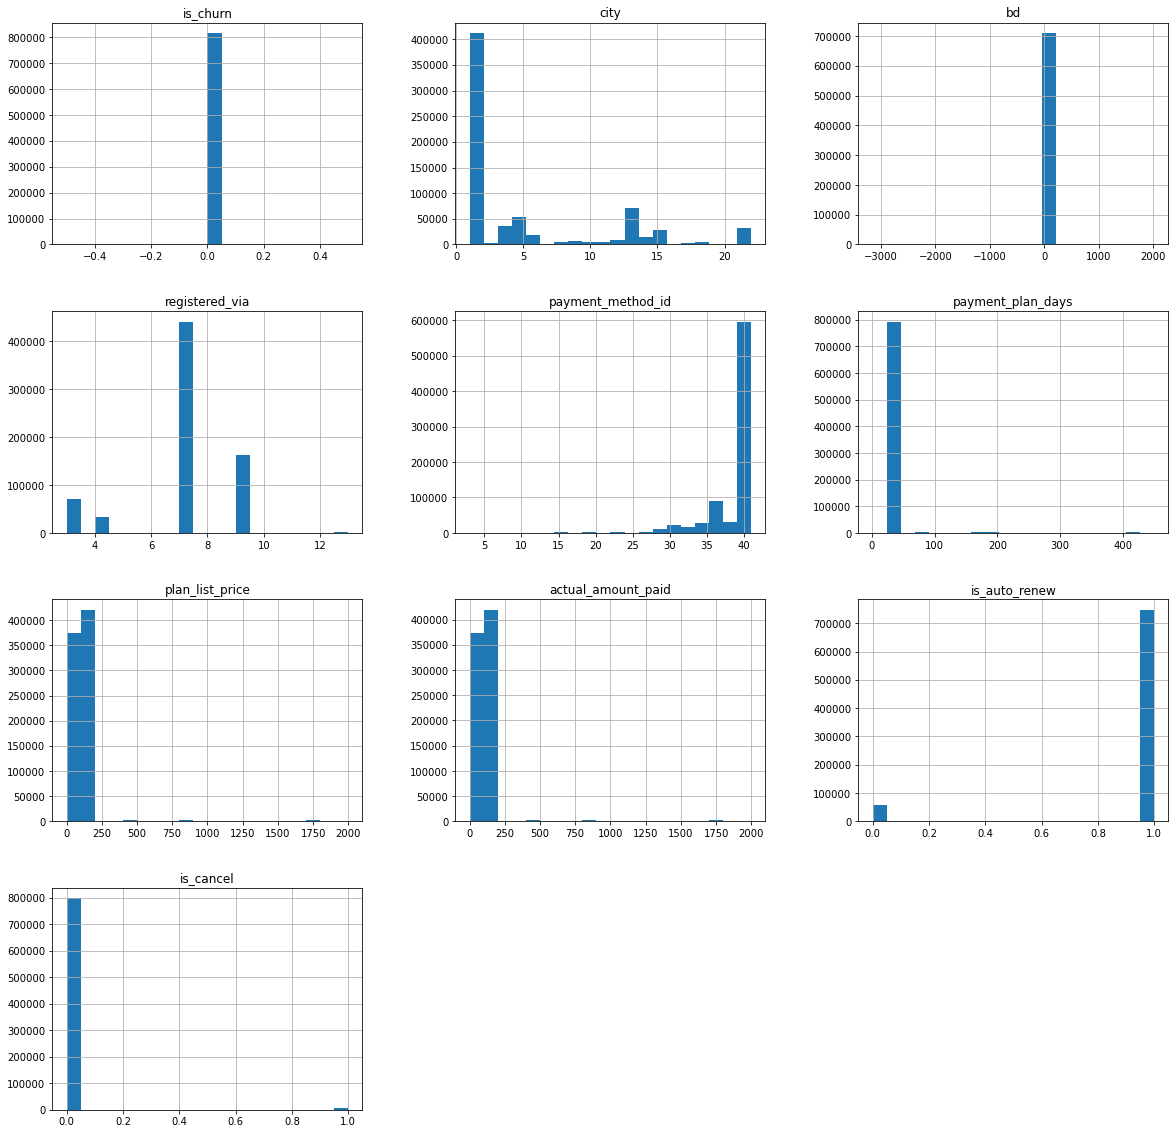

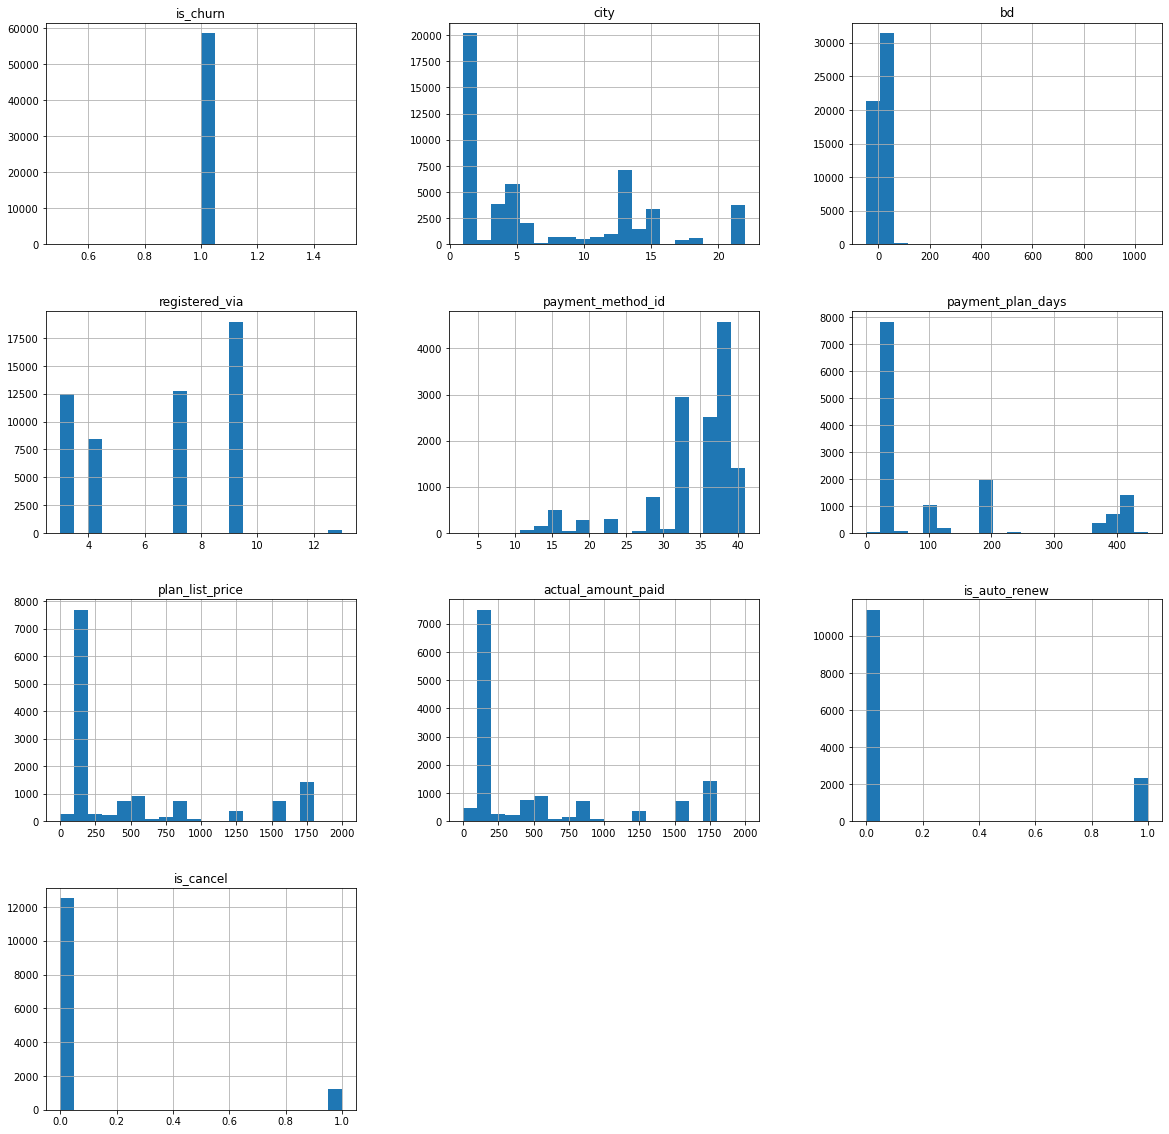

In [38]:
#fig, ax = plt.subplots()
df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)
df_merge_tra[df_merge_tra["is_churn"]==1].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)

array([[<AxesSubplot:title={'center':'is_churn'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'bd'}>],
       [<AxesSubplot:title={'center':'registered_via'}>,
        <AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'payment_plan_days'}>],
       [<AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'actual_amount_paid'}>,
        <AxesSubplot:title={'center':'is_auto_renew'}>],
       [<AxesSubplot:title={'center':'is_cancel'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

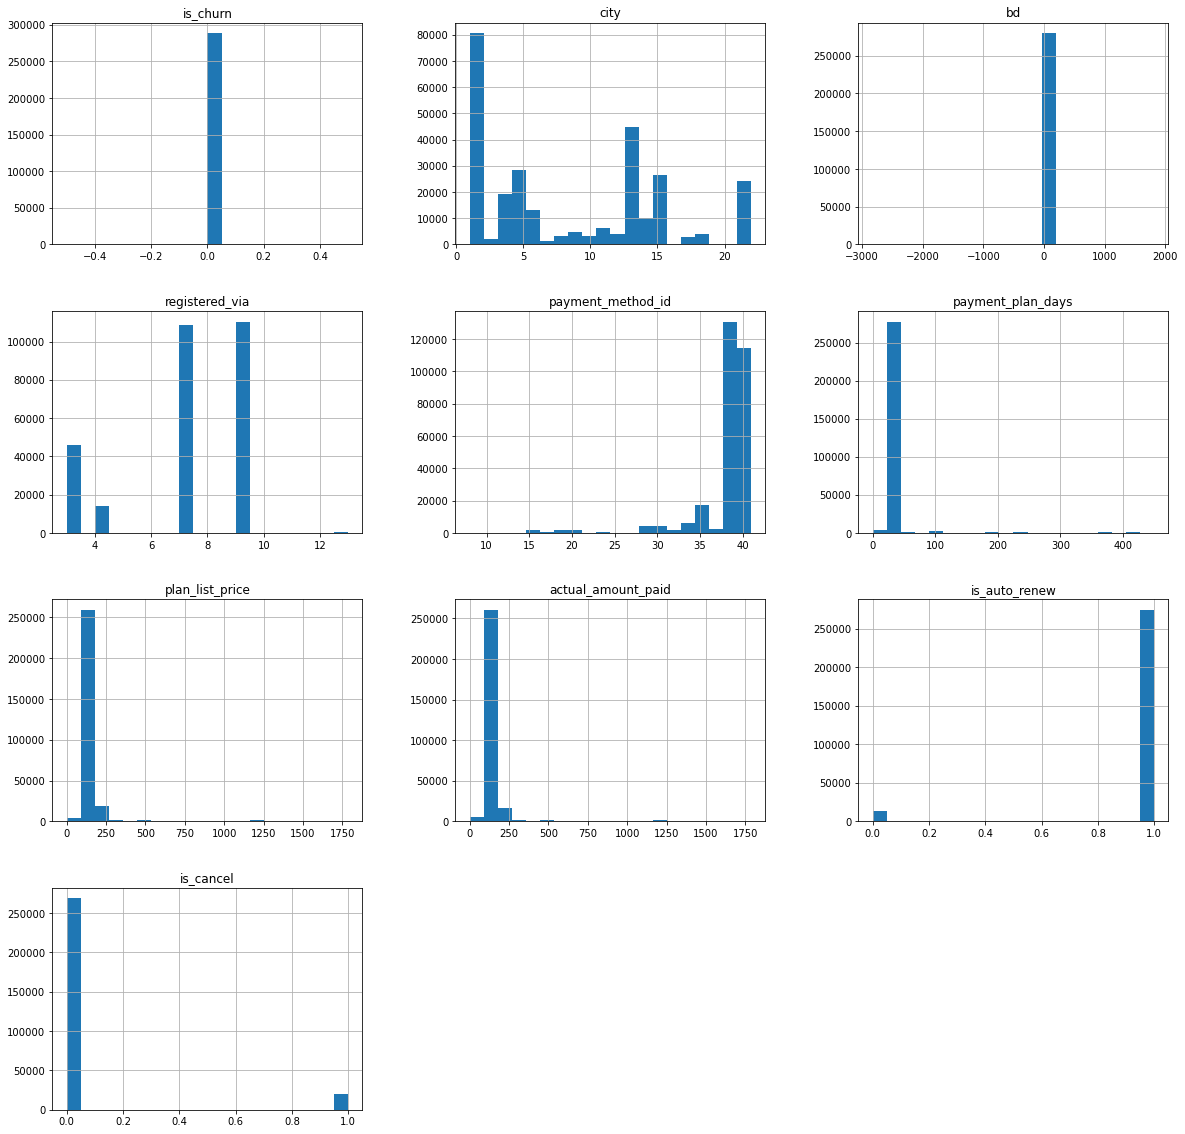

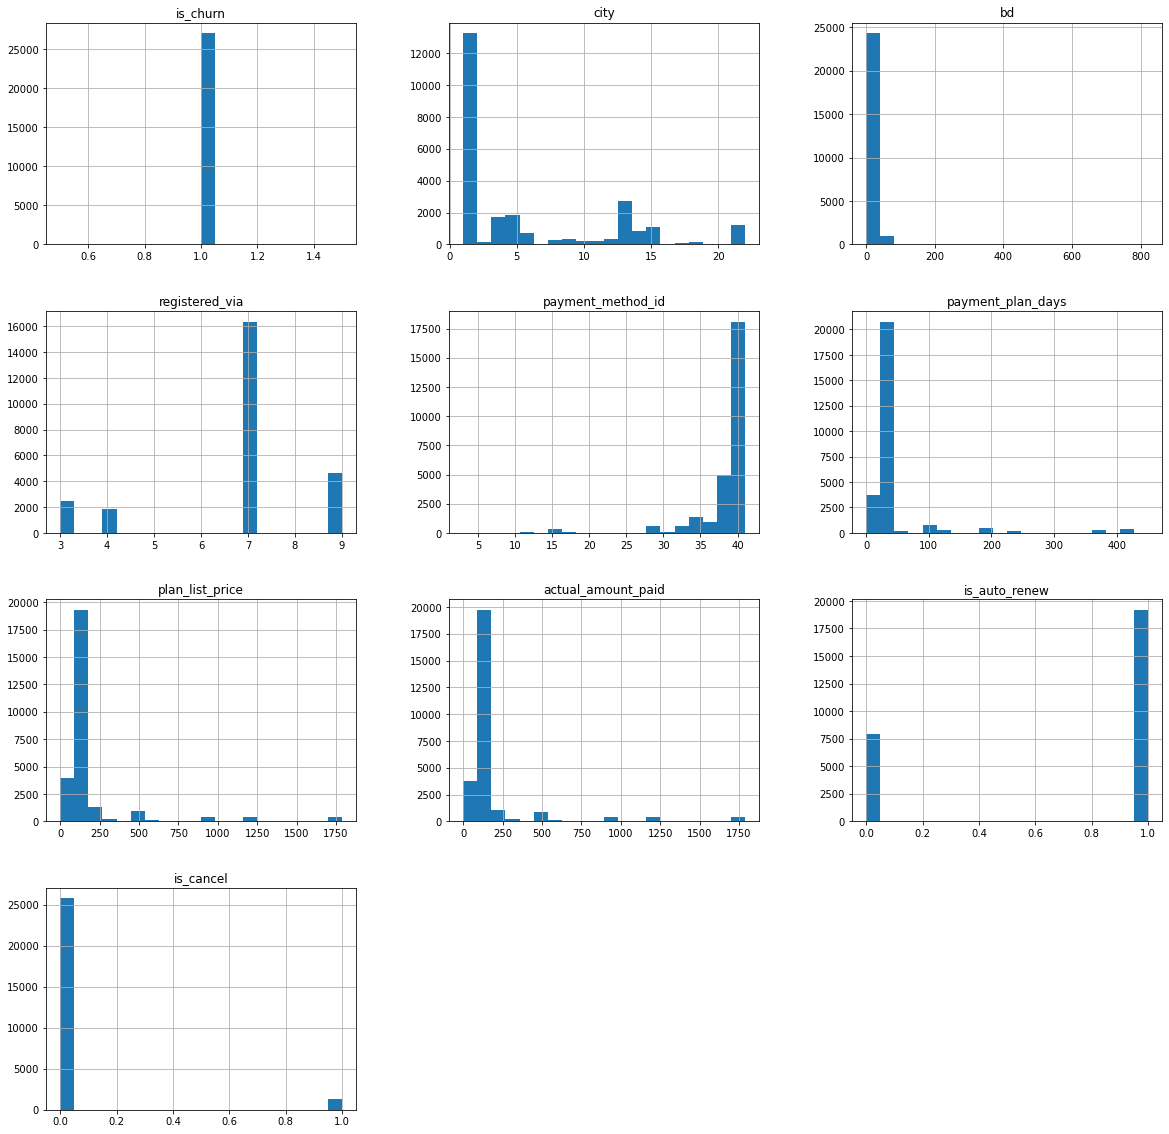

In [39]:
df_merge_tra_dupl=df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0].hist(figsize=(20,20),bins=20)
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)

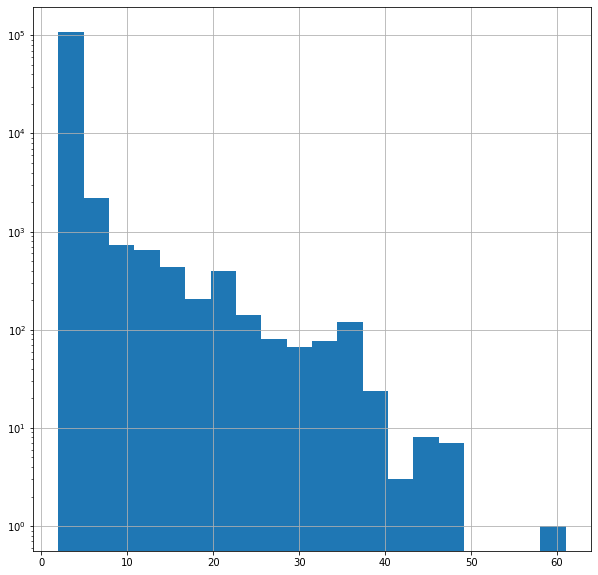

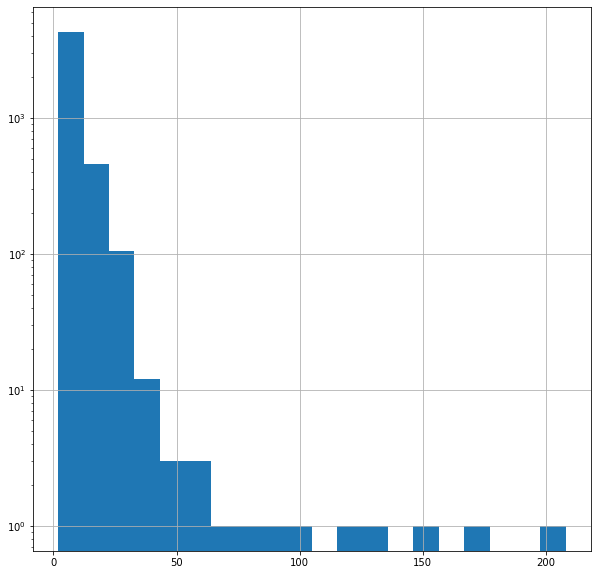

In [40]:
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')
#df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')

In [41]:
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts()

f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=    61
mg+IeEqwTD8RIi3MD3InzWbebMVApP/MN3WSCKtw0Tw=    49
GUlOynwcbchLoK1DjZ9pMqC3HiK1BOGDV3g4xuUeNA0=    48
m+pq8Tb2lxn1TB/12q2vD39g7ZuVwRPfBozroqf1YJY=    48
WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=    48
                                                ..
5ZfPkIPzkqf+oMjTHsZJfkOGs4jBtd2JQxHlfziT9FE=     2
3lSok/7+k83xXMOBYbTbQlzSMLVeqMF+J93QBTv+MuQ=     2
4uvE2OV5j35Qs4yrYilr4ULwAr80Bl+a/s9xQf4DWsg=     2
LJ8gt7lYy2TNzwUXM1Kp9ZX/jdppyXBUYtxlDfxXBNM=     2
YNaXj6gslcFwsnJxu3TD6Z6jKPmOBTmkN3q/ALrzDyE=     2
Name: msno, Length: 113513, dtype: int64

In [42]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg="].sort_values(by=["transaction_date"]).head(50)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
571432,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-06,2019-01-20,0.0
571436,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-06,2018-12-20,0.0
571389,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,119.0,1.0,2015-01-14,2019-02-20,0.0
571409,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-16,2019-03-23,0.0
571429,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-01-25,2019-04-23,0.0
571415,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-06,2019-05-21,0.0
571422,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-06,2019-06-18,0.0
571394,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,119.0,1.0,2015-02-14,2019-07-16,0.0
571391,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-16,2019-08-13,0.0
571406,f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=,0,1.0,0.0,NaN,7.0,2011-10-19,2011-10-19,41.0,30.0,149.0,149.0,1.0,2015-02-25,2019-09-10,0.0


In [43]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()

72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
vf6eQrnFfiS9o1kB/gRUJ4iTUixS9tHNKizqQ/1vLDI=    117
                                               ... 
ZSuyF6iQpokHuJlBcjOE6/RM6E6v53ZrFKmojHx0w20=      1
vbFA/VxW6h7lq1bgVzLFSieO7SHo6xYhI8rnbCIZ6I0=      1
uqJ/xmK+WUcVEwaSR4n5ERnhvencC56s9fA2SkokgSI=      1
rLFK7rmtSZxdnznyo5ajBvEY1qf/YCeIhiDnmaVejb8=      1
FrRZH6XFGSfHGZifRbTqT7CsDk8v5R0St2M4I9Mry9Y=      1
Name: msno, Length: 1844, dtype: int64

In [44]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]!=0)]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
35,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,119.0,1.0,2015-07-14,2017-05-13,0.0
36,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,119.0,119.0,1.0,2015-10-14,2017-11-13,0.0
37,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-11-13,2017-12-13,0.0
38,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-09-13,2017-08-13,0.0
39,MDPBYx0uEMympwcv3kxn65pVn53KV+z+ddol4sC+e7U=,1,13.0,34.0,male,7.0,2010-10-12,2010-10-12,41.0,30.0,149.0,149.0,1.0,2015-08-13,2017-06-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85590,OHD0vdheIRirXYvLsG6I6NSvGujb87/iOYkPElOy9Tc=,1,1.0,0.0,NaN,4.0,2016-04-16,2016-04-16,38.0,410.0,1788.0,1788.0,0.0,2017-02-03,2018-03-25,0.0
85592,0DpKnpv+wKk4jbdv5OA8Q39AjxP/fWh0lSMTN4BlqUI=,1,1.0,0.0,NaN,4.0,2016-05-02,2016-05-02,36.0,30.0,180.0,180.0,0.0,2017-01-24,2017-05-24,0.0
85593,0DpKnpv+wKk4jbdv5OA8Q39AjxP/fWh0lSMTN4BlqUI=,1,1.0,0.0,NaN,4.0,2016-05-02,2016-05-02,36.0,30.0,180.0,180.0,0.0,2017-01-24,2017-04-24,0.0
85597,HixLfqufftHNBXTEp5sLz30uoXRm2fiODC8YvqXVqjI=,1,5.0,28.0,male,4.0,2016-05-22,2016-05-22,36.0,30.0,180.0,180.0,0.0,2017-03-27,2017-04-26,0.0


In [45]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0="].sort_values(by=["actual_amount_paid"]).head(210)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
40934,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2017-11-02,0.0
41029,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-04-06,0.0
41028,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-01-31,0.0
41027,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2020-08-18,0.0
41026,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-11-22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40970,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-10-28,0.0
40969,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2018-06-20,0.0
40968,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2017-07-05,0.0
40966,SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=,1,1.0,0.0,NaN,4.0,2016-01-10,2016-01-10,38.0,10.0,0.0,0.0,0.0,2016-02-29,2019-12-22,0.0


In [46]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
85834,wO/oxTDjm4arkUMH8kbwbHU656jjx4Agy2mUWFEYqjY=,0,5.0,25.0,male,9.0,2006-04-15,2006-04-15,35.0,7.0,0.0,0.0,0.0,2017-02-20,2018-04-29,0.0
86702,VbSJcK0E0zLbbBXmiy/+92Hc0N+PFrrHpVBySMGkV0c=,0,1.0,0.0,NaN,7.0,2011-03-08,2011-03-08,41.0,0.0,0.0,149.0,1.0,2015-05-06,2018-07-23,0.0
86708,VbSJcK0E0zLbbBXmiy/+92Hc0N+PFrrHpVBySMGkV0c=,0,1.0,0.0,NaN,7.0,2011-03-08,2011-03-08,41.0,0.0,0.0,149.0,1.0,2015-04-27,2018-06-22,0.0
86797,E/tuGLoS5xcQS3gBsQuK5yc8JKvGwMxSLXQeqsHPKLQ=,0,7.0,30.0,female,7.0,2011-06-10,2011-06-10,41.0,0.0,0.0,149.0,1.0,2015-05-13,2017-08-12,0.0
86806,E/tuGLoS5xcQS3gBsQuK5yc8JKvGwMxSLXQeqsHPKLQ=,0,7.0,30.0,female,7.0,2011-06-10,2011-06-10,41.0,0.0,0.0,149.0,1.0,2015-05-13,2017-09-12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187820,NMSeYUhO1/Wq/S0NY9CudCnNalSaKscbW4kfA/Qq7kc=,0,1.0,23.0,female,3.0,2015-02-15,2015-02-15,35.0,7.0,0.0,0.0,0.0,2017-02-20,2017-05-16,0.0
1188777,nujc+EtIpkRuGU8Gg941U6ppIH7mQB+S3vOIWBaDPH4=,0,8.0,22.0,female,9.0,2015-12-20,2015-12-20,35.0,7.0,0.0,0.0,0.0,2017-02-20,2018-04-24,0.0
1189035,nfU0uuM1N2EkqFmCz/T+tGI2/bEreJBrfzy7RygGYGo=,0,1.0,21.0,NaN,7.0,2016-02-15,2016-02-15,17.0,240.0,0.0,0.0,0.0,2017-03-04,2017-03-07,0.0
1189206,PkekE9vAt2a2bSgh/11/hUskUFeSbAU9QSBtldfP2mY=,0,1.0,0.0,NaN,4.0,2016-04-03,2016-04-03,35.0,7.0,0.0,0.0,0.0,2017-02-20,2017-05-22,0.0


In [47]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()

o1lZFzHqOGKUqc4bNQBqz0b+OuPZkMeCPwo2Q9BK6V8=    9
7zVj7hq7W8ivp72I4c4n4ZPu2sK48GQZsBqvbHkYtYo=    5
PtO8GiaYp9zOm0NYSLgQDCPpMCwI6PAQtBO2Fm8ERBs=    5
++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=    5
o5aFK3grQrjlHACDVvS0cPa1KvLq9x9KeTM/L2SgLz0=    4
                                               ..
pjBXcDAqxEtxCZxpaCZx52td6gnZo+Izh7oIVdvBMic=    1
lx/C/rBqwMjwIXa/O3jVQHH4WbYvzPNueS2PJ6eezrQ=    1
EwzxHTz4MbQqIqX+G1Jei/AwdmNgD0mvzYcE9jtvdYc=    1
MqDIinjyQDUvtjlLJNZCXmUEktm6+8GUJDYvXPFwQHc=    1
Q/dT/kYm4S/QuKcuKilI4R/PAx+DAdAYzA8L9Jx230A=    1
Name: msno, Length: 3773, dtype: int64